In [1]:
from sys import displayhook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import sklearn as sk
from sklearn import metrics
 
df = pd.read_csv('Diabetic Retinopathy.csv', index_col=False)
df = df.reset_index(drop=True)
df = df.drop(columns=df.columns[0])
df.columns =["Quality (0=Bad, 1=Good)","Pre-screening (1=Severe, 0=Lack)","MA detection 1","MA detection 2","MA detection 3","MA detection 4","MA detection 5","MA detection 6","Pixel ROI 1","Pixel ROI 2","Pixel ROI 3","Pixel ROI 4","Pixel ROI 5","Pixel ROI 6","Pixel ROI 7","Pixel ROI 8","Euclidean distance" , "Diameter of optic" , "Binary result (AM/FM) " , "1 = Signs of DR, 0 = Normal"]
df
#Makes table of the column names by using the CSV

,"Quality (0=Bad, 1=Good)","Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


In [2]:
df2 = df.loc[df["Quality (0=Bad, 1=Good)"]  == 1 ]
df3 = df2.drop(columns=["Quality (0=Bad, 1=Good)"])
#Drops the column that is to do with quality, as it has data that makes it useless
df3

,"Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
0,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


In [3]:
df_max_scaled = df3.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()     
df4 = df_max_scaled
df4
#Normalization of the data so that it can be used easily later in the code

,"Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
0,1.0,0.145695,0.166667,0.183333,0.180952,0.185567,0.157303,0.123523,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.822170,0.456321,1.0,0.0
1,1.0,0.158940,0.181818,0.183333,0.171429,0.164948,0.146067,0.142868,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.879590,0.658826,0.0,0.0
2,1.0,0.410596,0.454545,0.491667,0.514286,0.484536,0.370787,0.138217,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.896469,0.586444,0.0,1.0
3,1.0,0.364238,0.401515,0.441667,0.476190,0.443299,0.348315,0.100182,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.816059,0.523679,0.0,0.0
4,1.0,0.291391,0.333333,0.366667,0.390476,0.402062,0.303371,0.044626,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.803650,0.563743,0.0,1.0
5,1.0,0.291391,0.325758,0.341667,0.390476,0.381443,0.325843,0.070200,0.041498,0.021738,0.005417,0.000000,0.000000,0.000000,0.000000,0.849065,0.578201,0.0,1.0
6,0.0,0.192053,0.219697,0.241667,0.257143,0.257732,0.179775,0.038244,0.054531,0.015400,0.000000,0.000000,0.000000,0.000000,0.000000,0.914771,0.636750,0.0,1.0
7,1.0,0.039735,0.045455,0.050000,0.057143,0.020619,0.011236,0.051195,0.056828,0.011536,0.002516,0.000000,0.000000,0.000000,0.000000,0.973153,0.324230,1.0,0.0
8,1.0,0.145695,0.159091,0.150000,0.142857,0.134021,0.112360,0.165104,0.140880,0.057991,0.008305,0.000000,0.000000,0.000000,0.000000,0.844408,0.532817,0.0,1.0
9,1.0,0.523179,0.568182,0.608333,0.676190,0.659794,0.528090,0.054815,0.060159,0.008246,0.001670,0.000455,0.000000,0.000000,0.000000,0.947219,0.497876,0.0,1.0


In [4]:
Training_Data = df4.sample(frac = 0.8)
#Splits the data into 80% for training purposes
Test_Data = df4.drop(Training_Data.index)
#Splits the data into the remaining 20% for the testing purposes 
Training_Data #Displaying the training data

,"Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
802,1.0,0.139073,0.151515,0.158333,0.161905,0.134021,0.067416,0.068034,0.033382,0.018708,0.018576,0.012708,0.025301,0.040117,0.017447,0.877197,0.500828,0.0,1.0
810,1.0,0.112583,0.113636,0.108333,0.095238,0.092784,0.056180,0.228282,0.210487,0.134662,0.016897,0.000000,0.000000,0.000000,0.000000,0.831295,0.532128,0.0,1.0
214,1.0,0.105960,0.121212,0.133333,0.142857,0.144330,0.146067,0.021282,0.034924,0.000431,0.000000,0.000000,0.000000,0.000000,0.000000,0.835657,0.654223,0.0,0.0
930,1.0,0.218543,0.250000,0.250000,0.238095,0.206186,0.134831,0.447212,0.369594,0.239693,0.114123,0.045134,0.018873,0.022755,0.014266,0.854119,0.461156,1.0,1.0
721,1.0,0.317881,0.348485,0.383333,0.419048,0.443299,0.337079,0.033702,0.026766,0.004045,0.000000,0.000000,0.000000,0.000000,0.000000,0.933796,0.459318,0.0,1.0
651,1.0,0.377483,0.409091,0.425000,0.419048,0.422680,0.258427,0.068135,0.047120,0.023832,0.007147,0.002511,0.002300,0.006174,0.010327,0.850021,0.603511,0.0,1.0
78,1.0,0.125828,0.136364,0.141667,0.133333,0.134021,0.089888,0.116355,0.169270,0.117152,0.026780,0.001681,0.000000,0.000000,0.000000,0.899179,0.394427,1.0,0.0
501,1.0,0.304636,0.333333,0.366667,0.390476,0.391753,0.314607,0.356215,0.356698,0.234142,0.100916,0.023342,0.022962,0.041878,0.062988,0.896558,0.471503,1.0,1.0
1130,1.0,0.245033,0.272727,0.275000,0.228571,0.185567,0.112360,0.093298,0.029786,0.011128,0.003094,0.000486,0.000398,0.000000,0.000000,0.903843,0.428592,0.0,1.0
1104,1.0,0.112583,0.121212,0.133333,0.142857,0.103093,0.101124,0.235733,0.219681,0.124600,0.041620,0.004587,0.001676,0.004006,0.005458,0.844903,0.438551,1.0,0.0


In [5]:
Training_Data

,"Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
802,1.0,0.139073,0.151515,0.158333,0.161905,0.134021,0.067416,0.068034,0.033382,0.018708,0.018576,0.012708,0.025301,0.040117,0.017447,0.877197,0.500828,0.0,1.0
810,1.0,0.112583,0.113636,0.108333,0.095238,0.092784,0.056180,0.228282,0.210487,0.134662,0.016897,0.000000,0.000000,0.000000,0.000000,0.831295,0.532128,0.0,1.0
214,1.0,0.105960,0.121212,0.133333,0.142857,0.144330,0.146067,0.021282,0.034924,0.000431,0.000000,0.000000,0.000000,0.000000,0.000000,0.835657,0.654223,0.0,0.0
930,1.0,0.218543,0.250000,0.250000,0.238095,0.206186,0.134831,0.447212,0.369594,0.239693,0.114123,0.045134,0.018873,0.022755,0.014266,0.854119,0.461156,1.0,1.0
721,1.0,0.317881,0.348485,0.383333,0.419048,0.443299,0.337079,0.033702,0.026766,0.004045,0.000000,0.000000,0.000000,0.000000,0.000000,0.933796,0.459318,0.0,1.0
651,1.0,0.377483,0.409091,0.425000,0.419048,0.422680,0.258427,0.068135,0.047120,0.023832,0.007147,0.002511,0.002300,0.006174,0.010327,0.850021,0.603511,0.0,1.0
78,1.0,0.125828,0.136364,0.141667,0.133333,0.134021,0.089888,0.116355,0.169270,0.117152,0.026780,0.001681,0.000000,0.000000,0.000000,0.899179,0.394427,1.0,0.0
501,1.0,0.304636,0.333333,0.366667,0.390476,0.391753,0.314607,0.356215,0.356698,0.234142,0.100916,0.023342,0.022962,0.041878,0.062988,0.896558,0.471503,1.0,1.0
1130,1.0,0.245033,0.272727,0.275000,0.228571,0.185567,0.112360,0.093298,0.029786,0.011128,0.003094,0.000486,0.000398,0.000000,0.000000,0.903843,0.428592,0.0,1.0
1104,1.0,0.112583,0.121212,0.133333,0.142857,0.103093,0.101124,0.235733,0.219681,0.124600,0.041620,0.004587,0.001676,0.004006,0.005458,0.844903,0.438551,1.0,0.0


In [6]:
Test_Data #Displaying the test data

,"Pre-screening (1=Severe, 0=Lack)",MA detection 1,MA detection 2,MA detection 3,MA detection 4,MA detection 5,MA detection 6,Pixel ROI 1,Pixel ROI 2,Pixel ROI 3,Pixel ROI 4,Pixel ROI 5,Pixel ROI 6,Pixel ROI 7,Pixel ROI 8,Euclidean distance,Diameter of optic,Binary result (AM/FM),"1 = Signs of DR, 0 = Normal"
1,1.0,0.158940,0.181818,0.183333,0.171429,0.164948,0.146067,0.142868,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.879590,0.658826,0.0,0.0
2,1.0,0.410596,0.454545,0.491667,0.514286,0.484536,0.370787,0.138217,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.896469,0.586444,0.0,1.0
16,1.0,0.695364,0.719697,0.675000,0.628571,0.474227,0.359551,0.304634,0.422249,0.352690,0.333588,0.287549,0.304246,0.395052,0.324692,0.885589,0.612443,1.0,1.0
23,1.0,0.066225,0.075758,0.075000,0.085714,0.092784,0.067416,0.180569,0.121374,0.092328,0.015331,0.000794,0.000000,0.000000,0.000000,0.893134,0.493415,1.0,0.0
24,1.0,0.033113,0.037879,0.041667,0.047619,0.041237,0.033708,0.329392,0.041230,0.025628,0.002843,0.000349,0.000578,0.000533,0.000342,0.993938,0.500677,1.0,1.0
29,1.0,0.682119,0.674242,0.691667,0.676190,0.618557,0.426966,0.027294,0.022511,0.000147,0.000183,0.000061,0.000155,0.000263,0.000505,0.824978,0.611732,0.0,1.0
38,1.0,0.284768,0.318182,0.350000,0.371429,0.381443,0.303371,0.097072,0.109348,0.037137,0.009775,0.000354,0.000453,0.001022,0.001475,0.795283,0.553798,0.0,0.0
39,0.0,0.105960,0.121212,0.133333,0.123810,0.103093,0.089888,0.112754,0.134583,0.045526,0.027979,0.008421,0.013129,0.005046,0.003444,0.862566,0.564423,0.0,1.0
41,1.0,0.033113,0.037879,0.041667,0.047619,0.041237,0.022472,0.172185,0.189460,0.123099,0.012286,0.000000,0.000000,0.000000,0.000000,0.848100,0.497333,0.0,0.0
43,1.0,0.086093,0.090909,0.091667,0.085714,0.082474,0.067416,0.005265,0.002021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.832690,0.619136,0.0,0.0


In [7]:
trainingdata_input = np.array(Training_Data.drop (columns = ["1 = Signs of DR, 0 = Normal"]))
trainingdata_output = np.array(Training_Data["1 = Signs of DR, 0 = Normal"])
#Drops the final result for the training data input but keeps it for the output
trainingdata_input

array([[1.        , 0.13907285, 0.15151515, ..., 0.87719704, 0.50082801,
        0.        ],
       [1.        , 0.11258278, 0.11363636, ..., 0.83129495, 0.53212834,
        0.        ],
       [1.        , 0.10596026, 0.12121212, ..., 0.83565652, 0.65422288,
        0.        ],
       ...,
       [1.        , 0.67549669, 0.75757576, ..., 0.90461942, 0.42259317,
        0.        ],
       [1.        , 0.11258278, 0.11363636, ..., 0.83137769, 0.53841487,
        0.        ],
       [1.        , 0.1589404 , 0.18181818, ..., 0.80994804, 0.34552165,
        1.        ]])

In [8]:
testingdata_input = np.array(Test_Data.drop (columns = ["1 = Signs of DR, 0 = Normal"]))
testingdata_output = np.array(Test_Data["1 = Signs of DR, 0 = Normal"])
#Drops the final result for the testing data input but keeps it for the output
testingdata_input

array([[1.        , 0.1589404 , 0.18181818, ..., 0.87958974, 0.658826  ,
        0.        ],
       [1.        , 0.41059603, 0.45454545, ..., 0.89646869, 0.58644428,
        0.        ],
       [1.        , 0.69536424, 0.71969697, ..., 0.88558924, 0.61244349,
        1.        ],
       ...,
       [1.        , 0.15231788, 0.15909091, ..., 0.83439516, 0.45247469,
        1.        ],
       [1.        , 0.30463576, 0.34848485, ..., 0.87970626, 0.43715528,
        0.        ],
       [1.        , 0.04635762, 0.0530303 , ..., 0.93916926, 0.40582758,
        0.        ]])

In [9]:
trainingdata_input.shape #Shapes the training data input

(918, 18)

In [10]:
testingdata_input.shape #Shapes the testing data input

(229, 18)

In [11]:
Train_input = trainingdata_input
Train_output = trainingdata_output.reshape(-1,1)

#Reshapes the output

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

#Defines both the sigmoid function and the derivative

In [13]:
weights_0 = 2 * np.random.random((18, 20)) - 1
weights_1 = 2 * np.random.random((20, 1)) - 1 
#Creates the weights required for the algorithm to work, and these are changed for testing

In [14]:
bias0 = np.random.uniform(size = 20, low = -1, high = 1)
bias1 = np.random.uniform(size = 1, low = -1, high = 1)
#Creates a bias for the code

In [15]:
epochs = 1000000
learning_rate = 0.01
error = []
#Creates the the epochs and the learning rate
for epoch in range(epochs):
  sum_synapse0 = np.dot(Train_input, weights_0)
  sum_synapse0 += bias0 #Adds the bias for the input layer 
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  sum_synapse1 += bias1 #Adds the bias for the output layer
  output_layer = sigmoid(sum_synapse1)
  #Reshapes the hidden layer
 
  error_output_layer = Train_output - output_layer
  average = np.mean(abs(error_output_layer))
  if epoch % 1000 == 0:
    #Prints the epoch after a specific range, which can be changed 
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)
  
  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output
  
  weights1T = weights_1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
  
  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate) #Update the weights
  
  input_layerT = Train_input.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate) #Updates the weights
   
bias0 += -learning_rate * delta_hidden_layer.mean()
bias1 += -learning_rate * delta_output.mean()



Epoch: 1 Error: 0.5035450434213478
Epoch: 1001 Error: 0.39914965344558484
Epoch: 2001 Error: 0.3645812954022352
Epoch: 3001 Error: 0.3453951165166894
Epoch: 4001 Error: 0.3329620251651968
Epoch: 5001 Error: 0.3207368107120767
Epoch: 6001 Error: 0.31236125194315023
Epoch: 7001 Error: 0.30586106823432063
Epoch: 8001 Error: 0.30036103235151845
Epoch: 9001 Error: 0.2954935251008705
Epoch: 10001 Error: 0.29117419971561215
Epoch: 11001 Error: 0.28729133513571103
Epoch: 12001 Error: 0.2837410455079475
Epoch: 13001 Error: 0.2803719515968825
Epoch: 14001 Error: 0.2770456725202598
Epoch: 15001 Error: 0.27378003015339997
Epoch: 16001 Error: 0.2706667797726418
Epoch: 17001 Error: 0.26777606021653855
Epoch: 18001 Error: 0.26513050486005657
Epoch: 19001 Error: 0.26271787227384175
Epoch: 20001 Error: 0.26052026188858735
Epoch: 21001 Error: 0.2584839745820314
Epoch: 22001 Error: 0.25652786939094346
Epoch: 23001 Error: 0.25461907863547356
Epoch: 24001 Error: 0.2527495024162411
Epoch: 25001 Error: 0.250

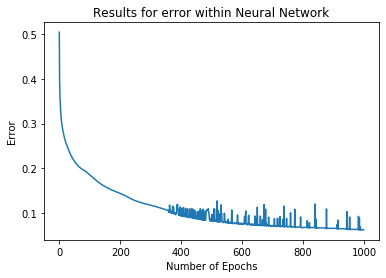

In [16]:
import matplotlib.pyplot as plt
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Results for error within Neural Network')
plt.plot(error)
plt.show()

In [17]:
test_input = testingdata_input
test_output = np.reshape(testingdata_output, (-1,1))

test_hidden_layer = sigmoid(np.dot(test_input, weights_0))
test_hidden_layer = np.hstack((test_hidden_layer, np.ones((test_hidden_layer.shape[0], 0))))
test_output_layer = sigmoid(np.dot(test_hidden_layer, weights_1))

test_prediciton = np.round(test_output_layer).astype(int)

###check ho this should be impleneted

In [18]:
#Calculates the confusion matrix
Confusion_Matrix = np.zeros((2,2))
for i in range(len(test_output)):
    Confusion_Matrix[int(test_output[i])][int(test_prediciton[i])] += 1


#Calculates the performance indices
TP = Confusion_Matrix[1,1]
TN = Confusion_Matrix[0,0]
FP = Confusion_Matrix[0,1]
FN = Confusion_Matrix[1,0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
TP_rate = TP / (TP + FN)
FP_rate = FP / (FP + TN)

print("Confusion Matrix:")
print(Confusion_Matrix)
print("Accurracy:", accuracy)
print("TP rate:", TP_rate)
print("FP rate:", FP_rate)



Confusion Matrix:
[[71. 48.]
 [31. 79.]]
Accurracy: 0.6550218340611353
TP rate: 0.7181818181818181
FP rate: 0.40336134453781514


In [19]:
print((TP + TN) / float(TP + TN + FP + FN))

0.6550218340611353


In [20]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.34497816593886466


In [21]:
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.7181818181818181


In [22]:
specificity = TN / (TN + FP)
print(specificity)

0.5966386554621849


In [23]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

0.40336134453781514


In [24]:
precision = TP / float(TP + FP)
print(precision)


0.6220472440944882


In [25]:
from sklearn.metrics import f1_score
F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
print(F1_score)


0.6666666666666667


In [26]:
auc = metrics.roc_auc_score(testingdata_output, test_prediciton)
print('AUC:' + str(auc))

AUC:0.6574102368220015


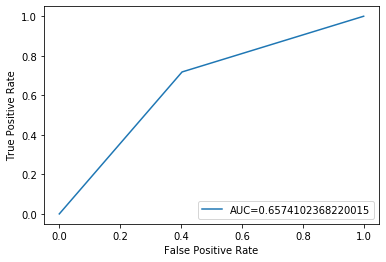

In [27]:
fpr, tpr, _ = metrics.roc_curve(testingdata_output, test_prediciton)

#create ROC curve
plt.plot(fpr,tpr, label = "AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(testingdata_output, test_prediciton))

0.6220472440944882
0.6220472440944882


In [29]:
output_prediction = pd.DataFrame(output_layer, columns = ['outputs'])
output_prediction['prediction'] = 1
output_prediction.loc[output_prediction['outputs'] < 0.5, 'prediction'] = 0
output_prediction

,outputs,prediction
0,1.000000e+00,1
1,9.999562e-01,1
2,4.118820e-09,0
3,9.489488e-01,1
4,7.281245e-01,1
5,1.000000e+00,1
6,2.922933e-02,0
7,9.997780e-01,1
8,1.000000e+00,1
9,2.062202e-03,0


In [30]:
df_class = pd.DataFrame(testingdata_output)

In [31]:
df_class
df_class.columns = ['Classifcation']

In [32]:
df_class

,Classifcation
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,0.0


In [33]:
actual = pd.DataFrame(Train_output)
both0 = pd.merge(actual,output_prediction, left_index = True, right_index = True)
both0

,0,outputs,prediction
0,1.0,1.000000e+00,1
1,1.0,9.999562e-01,1
2,0.0,4.118820e-09,0
3,1.0,9.489488e-01,1
4,1.0,7.281245e-01,1
5,1.0,1.000000e+00,1
6,0.0,2.922933e-02,0
7,1.0,9.997780e-01,1
8,1.0,1.000000e+00,1
9,0.0,2.062202e-03,0


In [34]:
both1 = pd.merge(both0,df_class, left_index=True, right_index=True)

In [35]:
both1

,0,outputs,prediction,Classifcation
0,1.0,1.000000e+00,1,0.0
1,1.0,9.999562e-01,1,1.0
2,0.0,4.118820e-09,0,1.0
3,1.0,9.489488e-01,1,0.0
4,1.0,7.281245e-01,1,1.0
5,1.0,1.000000e+00,1,1.0
6,0.0,2.922933e-02,0,0.0
7,1.0,9.997780e-01,1,1.0
8,1.0,1.000000e+00,1,0.0
9,0.0,2.062202e-03,0,0.0


In [36]:
both1['True Prediction'] = False
both1.loc[both1['Classifcation'] == both1['prediction'], 'True Prediction'] = True
both1['True Prediction'].value_counts(normalize = True)*100

True     50.218341
False    49.781659
Name: True Prediction, dtype: float64

In [37]:
trainingdata_input.shape

(918, 18)

In [38]:
testingdata_input.shape
trainingInput = np.concatenate((trainingdata_input, np.ones((trainingdata_input.shape[0], 1))), axis=1)

In [39]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
sk_input = trainingdata_input
sk_output = trainingdata_output
sk_test_input = test_input
sk_test_output = test_output
MLP = MLPClassifier(max_iter=100000)



parameter_space = {
    'hidden_layer_sizes': [(12,),(20,),(30,),(30,30,),(16,)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05 , 0.01, 0.001, 0.0005],
}
from sklearn.model_selection import GridSearchCV
MLP = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
MLP.fit(sk_input, sk_output) # X is train samples and y is the corresponding labels
print(MLP.score(sk_test_input, sk_test_output))
print(MLP.score(sk_input, sk_output))

0.7467248908296943
0.7570806100217865


In [40]:
x_train = sk_input
x_test = sk_test_input
y_train = sk_output
y_test = sk_test_output

In [41]:
print('Best parameters found:\n', MLP.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0005, 'hidden_layer_sizes': (30, 30), 'solver': 'adam'}


In [42]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
MLP2 = MLPClassifier(max_iter=100000, activation='tanh', alpha=0.0001, hidden_layer_sizes= (12,), solver= 'adam',).fit(x_train,y_train)
print(MLP2.score(sk_test_input, sk_test_output))
print(MLP2.score(sk_input, sk_output))
y_pred = MLP2.predict(sk_test_input)

0.7554585152838428
0.7668845315904139


TP rate 0.7181818181818181
FP rate 0.40336134453781514
[[92 27]
 [29 81]]
recall: 0.7363636363636363
precision: 0.75
accuracy: 0.7554585152838428
0.7431192660550459
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       119
         1.0       0.75      0.74      0.74       110

    accuracy                           0.76       229
   macro avg       0.76      0.75      0.75       229
weighted avg       0.76      0.76      0.76       229



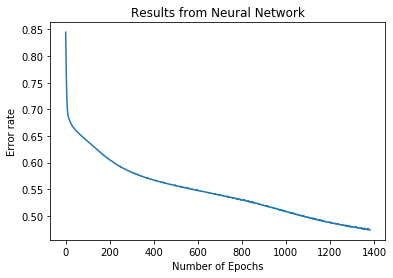

In [43]:
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
print(c_matrix)
print("recall:",metrics.recall_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test,y_pred))
print("accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
TN1 = c_matrix[0][0]
FN1 = c_matrix[1][0]
TP1 = c_matrix[1][1]
FP1 = c_matrix[0][1]

TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)

plt.plot(MLP2.loss_curve_)
plt.xlabel('Number of Epochs')
plt.ylabel('Error rate')
plt.title('Results from Neural Network')
plt.show()

In [44]:
MLP.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
 

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest.fit(x_train,y_train)
predictions = forest.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("F1 score:",metrics.f1_score(y_test,predictions))
print ("TP rate",TP_rate)
print ("FP rate",FP_rate)
c_matrix = metrics.confusion_matrix(y_test, predictions)
print(c_matrix)
TP_rate = TP1/(TP1+FN1)
FP_rate = FP1/(FP1+TN1)

Accuracy: 0.6899563318777293
F1 score: 0.6787330316742081
TP rate 0.7363636363636363
FP rate 0.226890756302521
[[83 36]
 [35 75]]
